# 02807: Project 1
 
## Practical information
 
* This project must be completed in groups of 3 students.
* This project must be handed in as a Google Colab notebook to the course site on DTU Inside. Go to the Assignments tab to upload your submission. 
* This project is due on Monday, November 2, 20:00.
* Each group has to hand in *one* notebook with their solutions.
* Your code must be written in Python.
* For each question you should use exactly the cells provided for your solution
* You should not remove the problem statements, and you should not modify the structure of the notebook.
* Your notebook should be runnable, i.e., clicking in the code cells should display the result that you want to have assessed.
 
## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 105.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* The following is an example of a contributions table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | **n.a.**      |
| **Part 4** | **n.a.**       |  Ann          |     John, Mary       | **n.a.**       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |
| **Part 6** | **n.a.**       | John, Mary, Ann           | **n.a.**      | **n.a.**      |

* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
* Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
* Several group members can take credit for the same solution if they all have contributed substantially to it.
* **Each group member must solve at least 105/3=35 points**. 
* **If no name is provided for an exercise's part, all group members will be assigned responsibility for it**.
* Group members should decide amongst themselves how to collaborate on the project to meet the above-mentioned constraints.  
* Grades are individual. The grade $\text{grade}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{grade}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$

* **Example**: in the contribution table above, suppose that all parts are solved correctly except for those of Exercise 4, which are both wrong. Then Ann's grade is calculated as follows:

  * $\text{individual-part}(Ann) = \frac{2.5 + 2.5 + 10 + 10 + 5 + 10 + 5}{2.5 + 2.5 + 10 + 10 + 5 + 10 + 5 + 10 + 10} = \frac{45}{65} = 0.692$

  * $\text{group-part} = \frac{85}{105} = 0.809$

  * $\text{grade}(Ann) =  7.14$


# Group declaration table 

This table must be filled before submission.



In [1]:
import pandas as pd
# we have all contributed to all parts of the project 
# :) 
d = {'Exercise 1' : ["", "", "", "", "", ""], 
     'Exercise 2' : ["", "", "", "", "", ""],
     'Exercise 3' : ["", "", "", "", "", ""], 
     'Exercise 4' : ["", "", "", "", "", ""],
     } 
  
ct = pd.DataFrame(d, index =['Part 1','Part 2','Part 3','Part 4','Part 5','Part 6']) 

ct

,Exercise 1,Exercise 2,Exercise 3,Exercise 4
Part 1,,,,
Part 2,,,,
Part 3,,,,
Part 4,,,,
Part 5,,,,
Part 6,,,,


# Introduction to the Datasets

![link text](https://ph-files.imgix.net/069dd825-cddf-4048-adde-8e81396c2c68?auto=format)


You will be working with datasets obtained through the [The Movie Database (TMDb) API](https://developers.themoviedb.org/3/getting-started/introduction). The first dataset is part of the MovieLens Latest Full Dataset, comprising 26 million ratings on 45.000 movies from 27.000 users. Let's look at the features in this dataset.

**Features**

* **adult**: Indicates if the movie is X-Rated.
* **belongs_to_collection**: A stringified dictionary with info on the movie series a particular film belongs to (e.g.: Lord of the Rings).
* **budget**: The movie budget in dollars.
* **genres**: A stringified list of dictionaries describing all genres associated with the movie.
* **homepage**: The movie's official homepage.
* **id**: An identifier for the movie.
* **imdb_id**: IMDB's identifier for the movie.
* **original_language**: The language in which the movie was shot.
* **original_title**: The original title of the movie.
* **overview**: A brief text about the movie.
* **popularity**: A Popularity Score given by TMDb.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with making of the movie.
* **production_countries**: A stringified list of countries in which the movie was produced.
* **release_date**: Release date of the movie in theaters.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of languages spoken in the film.
* **status**: The status of the movie (Released, To Be Released, etc.)
* **tagline**: The movie's tagline.
* **title**: The official title of the movie.
* **video**: Indicates whether there is a video of the movie in TMDb.
* **vote_average**: The average rating of the movie, on a 0-10 scale.
* **vote_count**: The number of votes by users, as counted by TMDb.

# Imports

First, let's make sure to import Pandas and NumPy. 

In [2]:
import pandas as pd 
import numpy as np

# Exercise 1: Loading, preprocessing and cleaning the data (15 points)

Read the movie dataset from the following URL.

In [3]:
url = 'http://courses.compute.dtu.dk/02807/2020/projects/project1/movies_metadata.csv'

## Part 1: Reading and preprocessing the data (10 pts)

Sometimes, raw data read from a file will be treated by default as string data. For example, the `genres` field in our dataset would be loaded by default as a stringified list of dictionaries. 

If we load this data as a string, we won't be able to access it conveniently. Some preprocessing step is therefore needed.

Write a function `load_movies_data()` that reads the URL into a Pandas DataFrame and preprocesses its columns to ensure that:

1. Data in the `release_date` field consists of Pandas `Timestamp` objects, except for missing values. For example, executing a code cell with `df.release_date[0]` should display the output `Timestamp('1995-10-30 00:00:00')`.

2. Data in the `belongs_to_collection` consists of Python dictionaries.

3. Data in the `genres`, `production_companies` and `production_countries` fields should consist of lists of Python dictionaries. 

For example, executing a code cell with `df.genres[0]` should display the output 
```
[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]
```
Note that that is a list object, not a string. The elements of the list are dictionaries (executing `df.genres[0][0]['name']` returns `'Animation'`). 

*Hint*: for items 2 and 3, you could use `ast.literal_eval`.

Do not loop explicitly over the rows of the DataFrame to perform these preprocessing steps. These format conversions can be performed more efficiently using Pandas' in-built functions and/or calling Pandas' `apply()`with appropriate arguments. You'll be asked below to time the loading and preprocessing step.

In [4]:
# your code goes here
import ast

def load_movies_data(url):
  # load data from URL
  df = pd.read_csv(url)
  # date time convertion
  df['release_date'] = pd.to_datetime(df['release_date'],format='%Y-%m-%d', errors='coerce')
  # python dictionaries
  # belongs_to_collection, genres, production_companies and production_contries
  df.belongs_to_collection = df.belongs_to_collection.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
  df.genres = df.genres.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
  df.production_companies = df.production_companies.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
  df.production_countries = df.production_countries.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
  return df

Now call `load_movies_data()` and load the data into a DataFrame `df`.

In [5]:
# your code goes here
df = load_movies_data(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
# check release_date  
df.release_date[0]

Timestamp('1995-10-30 00:00:00')

In [7]:
# check genres 
df.genres[0]

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

Display the DataFrame. You should check that it looks correct.

In [8]:
# your code goes here
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,Fa

## Part 2: Timing your function (2.5 pts)

Time the performance of your function. To get the points for this part, the time reported below must not exceed 60 seconds.

In [9]:
load_time = %timeit -o -r 3 load_movies_data(url)
print("Time (s):", load_time.best)

/usr/local/lib/python3.6/dist-packages/IPython/core/magics/execution.py:1057: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  time_number = timer.timeit(number)
/usr/lib/python3.6/timeit.py:206: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  t = self.timeit(number)


1 loop, best of 3: 8.54 s per loop
Time (s): 8.54208628899994


## Part 3: Cleaning the data (2.5 pts)

Filter/drop all rows meeting any of these conditions:
* The `adult` value is not `'False'`
* The `vote_count` value is missing
* The `vote_average` value is missing

Do not loop over rows to perform these checks. Use Pandas' in-built functionality to do so. 

In [10]:
# your code goes here

# Dropping all rows where adults=True
df[df.adult != True]

# Dropping all rows where vote_count and vote_average are missing
df['vote_count'].replace('', np.nan, inplace=True)
df.dropna(subset=['vote_count'], inplace=True)
df['vote_average'].replace('', np.nan, inplace=True)
df.dropna(subset=['vote_average'], inplace=True)

# Exercise 2: Computing IMDb's ratings (35 points)

The Top Rated 250 titles in IMDb are calculated using [a formula](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculatetop) that takes into account the number of votes that a title has received, the minimum votes required to be on the list, and the mean vote for all titles. The rating for a title is given as follows:

$$ \text{weighted rating } = \left(\frac{v}{v+m} \cdot R\right) + \left(\frac{m}{v+m} \cdot C\right)$$

Where:

$m$ = the minimum number of votes required to be listed in the Top Rated ranking. We'll let $m=1000$.

$v$ = the number of votes received by the title (the title's **`vote_count`** value)

$R$ = the average rating for the title (the title's **`vote_average`** value)

$C$ = the mean vote across the whole list (the mean over the **`vote_average`** column)

We are going to compute the ratings for movies that could be listed in IMDb's Top Rated 250 ranking.  We want to do this as efficiently as possible. As a baseline for benchmarking, we'll use a non-optimised solution that simply loops over the rows of the dataset and computes the weighted rating for the corresponding movie, if the movie has more than 1000 votes. 

In [11]:
C = df['vote_average'].mean()
m = 1000

def weighted_rating(row):
  if row['vote_count'] > m:
    v = row['vote_count']
    R = row['vote_average']
    return (v/(v+m) * R) + (m/(v+m) * C)
  else:
    return np.nan

def weighted_rating_loop(df):
  rating_list = []
  for i in range(0, len(df)):
    rating = weighted_rating(df.iloc[i])
    rating_list.append(rating)
  df['imdb_rating'] = rating_list

In [12]:
weighted_rating_loop(df)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,imdb_rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.375480
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.524438
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,

Let's look at the average performance of this function:

In [13]:
basic_time = %timeit -r 3 -o weighted_rating_loop(df)
print("Best time:", basic_time.best)

1 loop, best of 3: 9.39 s per loop
Best time: 9.3899123220001


In the remaining parts of the exercise, you are going to be asked to come up with alternative ways to compute the ratings, using various methodologies. Let's create a score board to keep track of performance. Here's a description of the rows:

*   **Best single run time (s)**:  The best time used by your solution, in seconds.
*   **Marginal performance improvement**: The time improvement of your current solution over its immediately preceding solution. Given by: $\frac{\text{average single run time (s) of previous solution}}{\text{average single run time (s) of current solution}}$
*   **Performance improvement over basic looping**:  The time improvement over our baseline solution. Given by: $\frac{\text{average single run time (s) of weighted_rating_loop}}{\text{average single run time (s) of current solution}}$
*   **Best single run time (s, teacher)**: The time of a solution provided by the teacher. 
*   **Marginal performance improvement (teacher)**: The time improvement of the teacher's solution over its immediately preceding solution. 
*   **Performance improvement over basic looping (teacher)**:  The teacher's solution improvement over the baseline solution.



In [14]:
timing_data = {
        'Best single run time (s)': [basic_time.best,np.nan, np.nan, np.nan,np.nan],
        'Marginal performance improvement': [np.nan,np.nan, np.nan, np.nan,np.nan],
        'Performance improvement over basic looping': np.nan,
        'Best single run time (s, teacher)': [12.1,6.13, 0.940, 0.0079,0.00113],
        'Marginal performance improvement (teacher)': [np.nan,'x2.01', 'x6.15', 'x89.4', 'x6.1'],
        'Performance improvement over basic looping (teacher)': [np.nan,'x2.01', 'x12.87', 'x1531','x9307']}

timings = pd.DataFrame(timing_data,index=["Basic looping", "Iterrows looping", "Apply()", "Pandas vectorisation", "NumPy vectorisation"])
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,9.389912,NaN,NaN,12.10000,NaN,NaN
Iterrows looping,NaN,NaN,NaN,6.13000,x2.01,x2.01
Apply(),NaN,NaN,NaN,0.94000,x6.15,x12.87
Pandas vectorisation,NaN,NaN,NaN,0.00790,x89.4,x1531
NumPy vectorisation,NaN,NaN,NaN,0.00113,x6.1,x9307


**The grading for the following parts works as follows.**

Let $m$ be the marginal performance improvement for the teacher's solution over basic looping, and let $m'$ be the marginal performance improvement for your solution over `basic_time`. If a part gives $n$ points, then you will get the $n$ points if $m' \geq 0.5 m$, and 0 points otherwise.

You don't get extra points for performing faster than the teacher's solution. But this is of course possible and you should feel free to optimise away as much as you want!

## Part 1: Less bad looping with `iterrows` (2.5 pts)

Define a function `weighted_rating_iterrows(df)` that computes the ratings by looping over rows with the in-built iterator `iterrows`, and stores the results in a new column of the DataFrame called called `imdb_rating_iter`.

In [15]:
# your code goes here
def weighted_rating_iterrows(df):
  rating_list = []
  for index, row in df.iterrows():
    rating = weighted_rating(row)
    rating_list.append(rating)
  df['imdb_rating_iter'] = rating_list

Call the function and make sure that it works as intended.

In [16]:
weighted_rating_iterrows(df)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,imdb_rating,imdb_rating_iter
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.375480,7.375480
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.524438,6.524438
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaN
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN,NaN
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.

Time the performance of the function.

In [17]:
iterrows_time = %timeit -r 3 -o weighted_rating_iterrows(df)
print("Best time:", iterrows_time.best)

1 loop, best of 3: 3.9 s per loop
Best time: 3.8991627760001393


Update the score board with the best time, marginal and overall performance change you have obtained. Display the updated table below. 

In [18]:
# your code goes here
timings.loc['Iterrows looping',0:3] = [iterrows_time.best,
                                  "x{:.1f}".format(basic_time.best/iterrows_time.best),
                                  "x{:.1f}".format(basic_time.best/iterrows_time.best)]                     

timings

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  after removing the cwd from sys.path.


,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,9.389912,NaN,NaN,12.10000,NaN,NaN
Iterrows looping,3.899163,x2.4,x2.4,6.13000,x2.01,x2.01
Apply(),NaN,NaN,NaN,0.94000,x6.15,x12.87
Pandas vectorisation,NaN,NaN,NaN,0.00790,x89.4,x1531
NumPy vectorisation,NaN,NaN,NaN,0.00113,x6.1,x9307


## Part 2: Using `apply()`. (5 pts)

Define a function `weighted_rating_apply(df)` that computes the ratings using Pandas' `apply()` function, and stores the results in a new column of the DataFrame called `'imdb_rating_apply`.

In [19]:
# your code goes here
def weighted_rating_apply(df):
  df['imdb_rating_apply'] = df.apply(lambda row: weighted_rating(row), axis=1)

Call the function and make sure that it works as intended.

In [20]:
weighted_rating_apply(df)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,imdb_rating,imdb_rating_iter,imdb_rating_apply
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.375480,7.375480,7.375480
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.524438,6.524438,6.524438
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaN,NaN
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN,NaN,NaN
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'i

Time the performance of the function.

In [21]:
apply_time = %timeit -r 3 -o weighted_rating_apply(df)
print("Best time:", apply_time.best)

1 loop, best of 3: 550 ms per loop
Best time: 0.5497237029999269


Update the score board with the best time, marginal and overall performance change you have obtained. Display the updated table below. 

In [22]:
# your code goes here
timings.loc['Apply()',0:3] = [apply_time.best,
                              "x{:.1f}".format(iterrows_time.best/apply_time.best),
                              "x{:.1f}".format(basic_time.best/apply_time.best)]                     

timings

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  after removing the cwd from sys.path.


,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,9.389912,NaN,NaN,12.10000,NaN,NaN
Iterrows looping,3.899163,x2.4,x2.4,6.13000,x2.01,x2.01
Apply(),0.549724,x7.1,x17.1,0.94000,x6.15,x12.87
Pandas vectorisation,NaN,NaN,NaN,0.00790,x89.4,x1531
NumPy vectorisation,NaN,NaN,NaN,0.00113,x6.1,x9307


## Part 3: Understanding vectorisation (2.5 pts)

Explain briefly what vectorisation is and why vectorised operations in Python can be orders of magnitude faster than non-vectorised operations.

*your answer goes here* \\
Vectorisation is when you relace explicit loops with array expressions, which for instance can be dot product, outer product, or elementwise multiplication. This means that performing an operation on the array will result in the operation being applied on each element. This is much faster than looping, since it is designed to push the operation into the compiled layer, which NumPy is build upon. Python itself namely uses flexible types, where type-checking and function dispatches is performed before executing the code. By using compiled code instead can this be avoided and the code will run much faster.

## Part 4: Vectorised solution with Pandas (10 pts)

Let's find a vectorised solution using Pandas. You have to define a function `weighted_rating_pandas(df)` that computes the ratings in a vectorised way and stores them in a new column of the DataFrame called `imbd_ratings_pandas`. Use Pandas operations only: don't transform your data into NumPy arrays.

In [23]:
# your code goes here
def weighted_rating_pandas(df):
  idx = df['vote_count'] > m
  df_idx = df[idx] 
  v = df_idx['vote_count']
  R = df_idx['vote_average']
  df['imdb_rating_pandas'] =  (v/(v+m) * R) + (m/(v+m) * C)

Call the function and make sure it works as intended.

In [24]:
weighted_rating_pandas(df)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,imdb_rating,imdb_rating_iter,imdb_rating_apply,imdb_rating_pandas
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.375480,7.375480,7.375480,7.375480
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.524438,6.524438,6.524438,6.524438
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaN,NaN,NaN
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN,NaN,NaN,NaN
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.

Time the performance of the function.

In [25]:
pandas_time = %timeit -r 3 -o weighted_rating_pandas(df)
print("Best time:", pandas_time.best)

100 loops, best of 3: 5.07 ms per loop
Best time: 0.005073108149999826


Update the score board with the best time, marginal and overall performance change you have obtained. Display the updated table below. 

In [26]:
# your code goes here
timings.loc['Pandas vectorisation',0:3] = [pandas_time.best,
                                           "x{:.1f}".format(apply_time.best/pandas_time.best),
                                           "x{:.1f}".format(basic_time.best/pandas_time.best)]                     

timings

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  after removing the cwd from sys.path.


,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,9.389912,NaN,NaN,12.10000,NaN,NaN
Iterrows looping,3.899163,x2.4,x2.4,6.13000,x2.01,x2.01
Apply(),0.549724,x7.1,x17.1,0.94000,x6.15,x12.87
Pandas vectorisation,0.005073,x108.4,x1850.9,0.00790,x89.4,x1531
NumPy vectorisation,NaN,NaN,NaN,0.00113,x6.1,x9307


Time to reflect on your solution. Do the following: 
 
* Explain in words what your function does and why it is a vectorised solution. **If you don't explain how the function works, or your explanation has major errors, we will substract points for this part.**
 
* Display a profiler and give an analysis of what you see.

In [27]:
# your code goes here
!pip install line_profiler
%load_ext line_profiler
%lprun -f weighted_rating_pandas weighted_rating_pandas(df)

*Your explanation goes here* \\
Our function first find the indices of the rows, `idx`, where `vote_count` is greater than $m$. This means that `idx` is a boolean with `True` for the rows where the minimum number of votes required to be listed in the Top Rated ranking is met. Next the rows of `df` where `idx` is `True` are chosen and $v$ and $R$ are then determined by selecting the columns `vote_count` and `vote_average` respectively. By using the same indexing, $v$ and $R$ are vectors of the same length. Finally is the formula applied and due to the vectorisation is all IMDb ratngs computed simultaneously. \\

The profiler shows how much time it takes to run the function and it also makes it possible to understand which lines in the functions takes up the most time. Since the timer unit is `1e-06 s`, is the time for each line given in this order. It is clear from our profiler that the 4th line takes up about $50\%$ of the total computation time. This is probably due to the use of indexing in the large DataFrame. Moreover does the last line take up a reasonable proportion of the time, which might be due to the creation of a new column in `df`.

## Part 5: Vectorised solution with NumPy (10 pts)

Let's find a vectorised solution that uses NumPy to speed up the calculations. You have to define a function `weighted_rating_numpy(df)` that computes the ratings in a vectorised way and stores them in a new column of the DataFrame called `imbd_ratings_numpy`.

In [28]:
# your code goes here
def weighted_rating_numpy(df):
  res = np.full(df.shape[0], np.nan)
  idx = df['vote_count'].values > m
  df_idx = df[idx] 
  v = df_idx['vote_count'].values
  R = df_idx['vote_average'].values
  res[idx] = (v/(v+m) * R) + (m/(v+m) * C)
  df['imdb_ratings_numpy'] =  pd.DataFrame(res)

Call the function and make sure it works as intended.

In [29]:
weighted_rating_numpy(df)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,imdb_rating,imdb_rating_iter,imdb_rating_apply,imdb_rating_pandas,imdb_ratings_numpy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.375480,7.375480,7.375480,7.375480,7.375480
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.524438,6.524438,6.524438,6.524438,6.524438
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,NaN,NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaN,NaN,NaN,NaN
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN,NaN,NaN,NaN,NaN
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wr

Time the average performance of the function.

In [30]:
numpy_time = %timeit -r 3 -o weighted_rating_numpy(df)
print("Best time:", numpy_time.best)

100 loops, best of 3: 4.2 ms per loop
Best time: 0.004198070320001079


Update the score board with the best time, marginal and overall performance change you have obtained. Display the updated table below. 

In [31]:
# your code goes here
timings.loc['NumPy vectorisation',0:3] = [numpy_time.best,
                                           "x{:.1f}".format(pandas_time.best/numpy_time.best),
                                           "x{:.1f}".format(basic_time.best/numpy_time.best)]                     

timings

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  after removing the cwd from sys.path.


,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,9.389912,NaN,NaN,12.10000,NaN,NaN
Iterrows looping,3.899163,x2.4,x2.4,6.13000,x2.01,x2.01
Apply(),0.549724,x7.1,x17.1,0.94000,x6.15,x12.87
Pandas vectorisation,0.005073,x108.4,x1850.9,0.00790,x89.4,x1531
NumPy vectorisation,0.004198,x1.2,x2236.7,0.00113,x6.1,x9307


Time to reflect on your solution. Do the following: 
 
* Explain in words what your function does and why it is vectorised solution. **If you don't explain how the function works, or your explanation has major errors, we will substract points for this part.**
 
* Display a profiler and give an analysis of what you see.

In [32]:
# your code goes here
%load_ext line_profiler
%lprun -f weighted_rating_numpy weighted_rating_numpy(df)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


*Your explanation goes here* \\
Our function first produces a NumPy array with NaN's, `res`, which is really a vector with the length given by the number of rows in `df`. This vector is prealloated for the computation of the IMDb ratings. Next are the indices of the rows, `idx`, where `vote_count` is greater than $m$ computed as in `weighted_ratings_pandas`. However, the column `vote_count` is first changed to a NumPy array using `.values`, such that `idx` is a boolean Numpy array. $v$ and $R$ are determined as in `weighted_ratings_pandas` as well, but `.values` is applied to make both $v$ and $R$ Numpy arrays. Finally are the IMDb ratings calculated for all elements of the vectors at ones and the ratings are inserted in `res` according to `idx` to make sure that the ratings are order according to the movies in `df`. Finally is `res` converted to a DataFrame and inserted as its own column in `df`. \\

Again the profiler of the function is showed, whereby the amount of time used for each function line is given. It is clear that a reasonable proportion of the total time is used on line 5, which is actually the corresponding line to the one that took up about $50\%$ of the time in the function `weighted_ratings_pandas`. It is also worth noticing that it also takes up a great deal of the time to convert the Numpy array to a DataFrame and insering it in its own column in `df`.

## Part 6: Find out the top 25 titles (5 pts)

What are the top 25 titles? Now that we have the IMDb ratings conveniently stored in a column, display the top 25 titles, together with their IMDb rating:

In [33]:
# your code goes here
# Top 25 of IMDB Rating
df.sort_values(by=['imdb_rating'], ascending=False).head(25)[['original_title','imdb_rating']]

,original_title,imdb_rating
314,The Shawshank Redemption,8.192050
12481,The Dark Knight,8.097890
834,The Godfather,8.089722
2843,Fight Club,8.048849
292,Pulp Fiction,8.022669
15480,Inception,7.935370
351,Forrest Gump,7.917744
22879,Interstellar,7.896357
1154,The Empire Strikes Back,7.831067
7000,The Lord of the Rings: The Return of the King,7.831000


# Exercise 3: Predicting the genre of movies (35 points)

In this exercise, you'll be asked to create a number of features and use them to predict whether a movie is a science fiction movie or not. 
For this classification task, we'll work with a different part of the movies dataset, which contains more information for each movie.

In [34]:
train_url = 'http://courses.compute.dtu.dk/02807/2020/projects/project1/train.csv'

You'll try to predict whether a movie is a science fiction movie based on the other associated genres for the movie, the people and companies involved in making it, as well as its release date.

## Part 1: Adding binary features for genres (10 pts)

As in Exercise 1, the data on several columns is in a stringified format. Pre-process the following columns appropriately, as you did with the `genres` column in Part 1 of Exercise 1.
```
'belongs_to_collection', 'genres', 'production_companies','production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew'
```
 
Don't loop explicitly over the rows to perform this preprocessing. Use `apply()` or some form of vectorisation. Your dataframe should be named `train`.

In [35]:
# your code goes here
# read data 
train = pd.read_csv(train_url) 
#belongs_to_collection
train.belongs_to_collection = train.belongs_to_collection.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
#genres
train.genres = train.genres.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
#production_companies
train.production_companies = train.production_companies.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
#production_countries
train.production_countries = train.production_countries.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
# spoken_languages
train.spoken_languages=train.spoken_languages.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
# Keywords
train.Keywords=train.Keywords.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
# cast
train.cast=train.cast.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
# crew
train.crew=train.crew.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

Looking at the 'genres' column, you can see that movies have a varying number of associated genres.

In [36]:
# this will work only if you've already preprocessed the genres' column into lists of dicts
for i, v in enumerate(train.genres.head()):
    print(i, v)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


Count the number of movies that have $n$ associated genres, for each $n$ in the dataset. If a movie has no associated genres, assign it the number 0. 

You have to use Pandas in-built functions only (no explicit looping). For example, you could use `apply()` with an appropriate function to apply to each row. 

Once you have the counts, visualise them as a bar chart, with one bar per possible number of associated genres, and the height of the bar representing the number of movies with that number of genres.


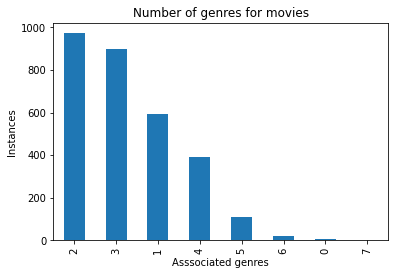

In [37]:
# your code goes here
num_associated_genres = train.genres.apply(lambda x: len(x) if isinstance(x,list) else 0)

# Bar chart
num_associated_genres.value_counts().plot(kind='bar', title='Number of genres for movies', xlabel='Asssociated genres', ylabel='Instances')

Let's create our binary features next. Complete the following taks:
 
 
1.   Find the the 20 most common genres. 
2.   Transform the `genres` column by replacing its current entries with the list of names of genres occurring in the entries.  For example, the entry 
```
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
```
should be transformed into:
```
['Romance','Comedy']
```
Empty entries should be transformed into the empty list `[]`.
3. Create a separate column for each of the 20 most common genres, with name `genre_(nameofgenre) (e.g. `genre_Comedy`). A movie should have a 1 on a genre's column if the genre is one of the associated genres for that movie, and a 0 otherwise.
 
Don't iterate explicitly over the rows to perform these operations. Use in-built functions, such as `apply()`, or vectorisation.

In [38]:
# your code goes here
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the genres column
train.genres = train.genres.apply(lambda x: list(map(lambda d: d['name'], x)) if isinstance(x, list) else [])

# 20 most common genres
common_genres = list(pd.Series(train.genres.sum()).value_counts().head(20).index)

# One-hot-encoding
one_hot_genre = pd.DataFrame(mlb.fit_transform(train.genres),
                            index=train.index)
one_hot_genre.columns = map(lambda s: 'genre_'+s, mlb.classes_)
# Column names for top 20
column_name = list(map(lambda s: 'genre_'+s, common_genres))
# Concatenating
train = pd.concat([train, one_hot_genre[column_name]], axis=1)

Visualise the number of movies per top 20 genre with a chart of your choice.

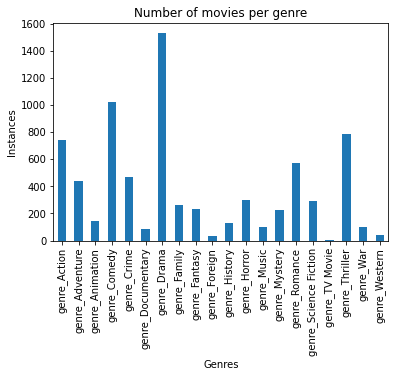

In [39]:
# your code goes here

# Bar chart
one_hot_genre.sum().plot(kind='bar', title='Number of movies per genre', xlabel='Genres', ylabel='Instances')

## Part 2: adding binary features for companies, crew and actors (5 pts)

You've now extracted binary features for all genres associated with a movie. When trying to predict whether a movie is a science fiction movie or not, knowing what other genres it is associated with may be useful. But there's other information that we could use to base our predictions. 

The `genres` column is just one out of several columns containing lists of dictionaries as entries. For example, the `production_companies` column also contains lists of dictionaries, providing names of the companies producing the movie. As you just did with genres, add new columns for:
 
1.   The names of the 30 most common production companies
2.   The names of the 30 most common production countries
3.   The names of the 30 most common actors (`cast` column) 
4.   The names of the 30 most common crew members
5.   The names of the 30 most common keywords
 
Don't iterate explicitly over to create these columns. Use `apply()` or vectorisation.

In [40]:
# your code goes here
def addingBinaryFeatures(df,column):
  mlb = MultiLabelBinarizer()

  # Transform the genres column
  train[column] = train[column].apply(lambda x: list(map(lambda d: d['name'], x)) if isinstance(x, list) else [])
  # 30 most common genres
  common = list(pd.Series(train[column].sum()).value_counts().head(30).index)
  # One-hot-encoding
  one_hot = pd.DataFrame(mlb.fit_transform(train[column]),
                              index=train.index)
  one_hot.columns = map(lambda s: column+'_'+s, mlb.classes_)
  # Column names for top 30
  column_name = list(map(lambda s: column+'_'+s, common))
  # Concatenating
  return pd.concat([df, one_hot[column_name]], axis=1)

In [41]:
train = addingBinaryFeatures(train,'production_companies')
train = addingBinaryFeatures(train,'production_countries')
train = addingBinaryFeatures(train,'cast')
train = addingBinaryFeatures(train,'crew')
train = addingBinaryFeatures(train,'Keywords')

Check the result. You should now have a much wider table, with the new columns consisting of binary features.

In [42]:
train.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,...,crew_Danny Elfman,crew_Billy Hopkins,crew_Mindy Marin,crew_Neal H. Moritz,crew_Alan Silvestri,crew_Tim Bevan,crew_Mark Isham,crew_Sarah Finn,crew_Hans Bjerno,crew_Scott Rudin,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_revenge,Keywords_dystopia,Keywords_friendship,Keywords_sex,Keywords_suspense,Keywords_sequel,Keywords_police,Keywords_love,Keywords_teenager,Keywords_nudity,Keywords_female nudity,Keywords_drug,Keywords_prison,Keywords_high school,Keywords_musical,Keywords_los angeles,Keywords_new york,Keywords_family,Keywords_father son relationship,Keywords_investigation,Keywords_kidnapping
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,NaN,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,NaN,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former n

 ## Part 3: adding numerical date features (10 points)

Next, we'll create some features based on the release date information. Create a new column storing the value for each of the following  aspects of a release date:
 
```
["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
```
 
As usual, you should use `apply()` or vectorisation to create these columns.

In [43]:
train.release_date = pd.to_datetime(train.release_date, errors='coerce')

In [44]:
# your code goes here
# Create column with the release year 
train['year'] = train.release_date.apply(lambda t: pd.Timestamp(t).year if pd.notnull(t) else [])

# Create column with the release weekday
train['weekday'] = train.release_date.apply(lambda t: pd.Timestamp(t).weekday() if pd.notnull(t) else [])

# Create column with the release month 
train['month'] = train.release_date.apply(lambda t: pd.Timestamp(t).month if pd.notnull(t) else [])

# Create column with the release week of the year 
train['weekofyear'] = train.release_date.apply(lambda t: pd.Timestamp(t).week if pd.notnull(t) else [])

# Create column with the release day 
train['day'] = train.release_date.apply(lambda t: pd.Timestamp(t).day if pd.notnull(t) else [])

# Create column with the release quater 
train['quarter'] = train.release_date.apply(lambda t: pd.Timestamp(t).quarter if pd.notnull(t) else [])

Next, we'll drop the columns that will not be used for learning. 

In [45]:
train = train.drop(['id','homepage', 'original_language','title', 'imdb_id','crew', 'poster_path', 'release_date', 'status','belongs_to_collection','Keywords','original_title','overview','production_companies','production_countries', 'spoken_languages', 'tagline', 'cast','genres'], axis=1)

Lastly, drop any rows with missing values.

In [46]:
# your code goes here
train.replace('', np.nan, inplace=True)
train = train.dropna()

In [47]:
train.head()

,budget,popularity,runtime,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,production_companies_Warner Bros.,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_companies_Twentieth Century Fox Film Corporation,production_companies_Columbia Pictures,production_companies_Metro-Goldwyn-Mayer (MGM),production_companies_New Line Cinema,production_companies_Touchstone Pictures,production_companies_Walt Disney Pictures,production_companies_Columbia Pictures Corporation,production_companies_TriStar Pictures,production_companies_Relativity Media,production_companies_Canal+,production_companies_United Artists,production_companies_Miramax Films,production_companies_Village Roadshow Pictures,...,crew_Mark Isham,crew_Sarah Finn,crew_Hans Bjerno,crew_Scott Rudin,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_revenge,Keywords_dystopia,Keywords_friendship,Keywords_sex,Keywords_suspense,Keywords_sequel,Keywords_police,Keywords_love,Keywords_teenager,Keywords_nudity,Keywords_female nudity,Keywords_drug,Keywords_prison,Keywords_high school,Keywords_musical,Keywords_los angeles,Keywords_new york,Keywords_family,Keywords_father son relationship,Keywords_investigation,Keywords_kidnapping,year,weekday,month,weekofyear,day,quarter
0,14000000,6.575393,93.0,12314651,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,4,2,8,20,1
1,40000000,8.248895,113.0,95149435,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,4,8,32,6,3
2,3300000,64.299990,105.0,13092000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,4,10,41,10,4
3,1200000,3.174936,122.0,16000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,4,3,10,9,1
4,0,1.148070,118.0,3923970,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,3,2,6,5,1


## Part 4: Prediction (10 pts)

Let's load the necessary `sklearn` libraries and prepare the training data for learning. Recall that your goal is to predict whether a movie has science fiction as an associated genre. So you're dealing with a binary classification task.

In [48]:
from sklearn.model_selection import train_test_split
import numpy as np

Use `sklearn` to prepare the training and test sets, setting aside 15% of the data for testing. Call the training input features, training labels, test input features and test labels as follows:

```
x_train, x_test, y_train, y_test
```



In [49]:
# your code goes here
# target labels
y = train['genre_Science Fiction']
# input features
x = train.drop(['genre_Science Fiction'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15)

# data split
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(2548, 179) (2548,)
(450, 179) (450,)


Feature scaling is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). Run the following code to feature scale your input data.

In [50]:
x_train.head()

,budget,popularity,runtime,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,production_companies_Warner Bros.,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_companies_Twentieth Century Fox Film Corporation,production_companies_Columbia Pictures,production_companies_Metro-Goldwyn-Mayer (MGM),production_companies_New Line Cinema,production_companies_Touchstone Pictures,production_companies_Walt Disney Pictures,production_companies_Columbia Pictures Corporation,production_companies_TriStar Pictures,production_companies_Relativity Media,production_companies_Canal+,production_companies_United Artists,production_companies_Miramax Films,production_companies_Village Roadshow Pictures,production_companies_Regency Enterprises,...,crew_Mark Isham,crew_Sarah Finn,crew_Hans Bjerno,crew_Scott Rudin,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_revenge,Keywords_dystopia,Keywords_friendship,Keywords_sex,Keywords_suspense,Keywords_sequel,Keywords_police,Keywords_love,Keywords_teenager,Keywords_nudity,Keywords_female nudity,Keywords_drug,Keywords_prison,Keywords_high school,Keywords_musical,Keywords_los angeles,Keywords_new york,Keywords_family,Keywords_father son relationship,Keywords_investigation,Keywords_kidnapping,year,weekday,month,weekofyear,day,quarter
713,80000000,14.987902,132.0,10166502,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2005,4,8,32,12,3
764,0,2.132858,115.0,8800000,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1989,4,3,9,3,1
2061,40000000,9.738371,116.0,161834276,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,3,2,5,3,1
1426,46000000,7.420019,99.0,107196498,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2000,3,6,24,15,2
1624,85000000,14.048694,93.0,252712101,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1997,3,6,26,26,2


In [51]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

Check that the shape of your data looks correct.

In [52]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2548, 179) (2548,)
(450, 179) (450,)


Train a classifier of your choice. Then print the accuracy and confusion matrix over the validation set. You should be able to get around 90% accuracy, although the number of false negatives is likely to be quite high.

In [53]:
# your code goes here
from sklearn import datasets, svm, metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# creating a Support Vector Classification  
svc = svm.SVC(gamma=0.001)

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print('Accuracy on test set:', accuracy_score(y_pred,y_test))

Accuracy on test set: 0.9022222222222223


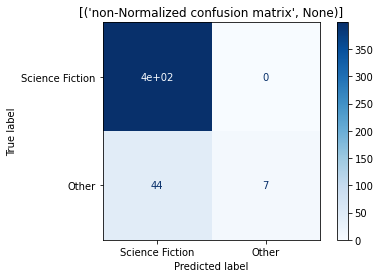

In [54]:
# Plot normalized confusion matrix
titles_options = [("non-Normalized confusion matrix", None)]
class_names = ['Science Fiction','Other']
disp = plot_confusion_matrix(svc, x_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues)
disp.ax_.set_title(titles_options)
plt.show()

# Exercise 4: Basic movie recommendation system (20 points)

In this exercise, you'll build a simple movie recommendation system.  The system will take a movie as input and recommend a list of similar movies. In order to recommend similar movies, you will use the correlation between the ratings of movies as a similarity metric. 

The data for this exercise is available in the following URLs. It contains basic info about movies, as well as ratings provided by several users.

In [55]:
import pandas as pd
import numpy as np
url1 = 'http://courses.compute.dtu.dk/02807/2020/projects/project1/ratings.csv'
url2 = 'http://courses.compute.dtu.dk/02807/2020/projects/project1/movies.csv'

## Part 1: Preparing the ratings data (10 pts)

Read the data from these two URLs, and create a single dataframe from them, with the following columns:

| userId | movieId | rating | timestamp | title | genres |
|--------|---------|--------|-----------|-------|--------|
|        |         |        |           |       |        |

Call the dataframe `movie_data`.

In [56]:
# your code goes here
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
movie_data = pd.merge(df1,df2,on='movieId')
movie_data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


To find the correlation between the ratings of movies, create a dataframe where each column is a movie name and each row contains the rating assigned by a specific user to that movie. 

You'll notice that this dataframe has many NaN values, since each movie is not rated by every user. Call the dataframe `user_ratings`.

In [57]:
# your code goes here
user_ratings = movie_data.pivot_table(index ='userId', values='rating', columns='title', dropna = False)
user_ratings.columns.name = None
user_ratings

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Part 2: Finding the most similar movies (10 pts)

Each column contains all the user ratings for a particular movie. Let's take the user ratings for the movie Toy Story.

In [58]:
toystory_ratings = user_ratings['Toy Story (1995)']
toystory_ratings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      4.0
      ... 
606    2.5
607    4.0
608    2.5
609    3.0
610    5.0
Name: Toy Story (1995), Length: 610, dtype: float64

Next, find the correlation between the user ratings for Toy Story and the user ratings of all other movies. 
 
More specifically, create a dataframe that contains two columns, called `title` and `Correlation`. Each row should contain a movie title $x$, followed by the pairwise correlation between the column of ratings for Toy Story and the column of ratings for $x$.  Drop any rows with null values, and display the resulting dataframe.
 
Use in-built functions to compute correlations and avoid explicit loops.

In [59]:
# your code goes here
df_corr = pd.DataFrame(user_ratings.corrwith(pd.Series(toystory_ratings)).dropna(),columns=['Correlation'])
df_corr

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
"'burbs, The (1989)",0.240563
(500) Days of Summer (2009),0.353833
*batteries not included (1987),-0.427425
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),-0.285732
...,...
[REC] (2007),0.129185
eXistenZ (1999),0.333282
xXx (2002),-0.244733
xXx: State of the Union (2005),0.129969


Sort the movies by descending order of correlation to find out highly correlated movies at the top. Display the 5 most highly correlated movies.


In [60]:
# your code goes here
df_corr = df_corr.sort_values(by='Correlation', ascending=False)
df_corr.head(5)

,Correlation
Land Before Time III: The Time of the Great Giving (1995),1.0
Faster Pussycat! Kill! Kill! (1965),1.0
Amen. (2002),1.0
"Machine Girl, The (Kataude mashin gâru) (2008)",1.0
Waydowntown (2000),1.0


If you computed correlations correctly, you will find that the recommended movies are not very well known. We can generate more popular recommendations by finding highly correlated movies that have a sensible number of ratings. 
 
Add a column to your correlation table, called `rating_counts`, which stores the number of ratings received by each movie.

In [61]:
# your code goes here
rating_counts = user_ratings.count()
df_corr['rating_counts'] = rating_counts
df_corr.head(5)

,Correlation,rating_counts
Land Before Time III: The Time of the Great Giving (1995),1.0,3
Faster Pussycat! Kill! Kill! (1965),1.0,5
Amen. (2002),1.0,3
"Machine Girl, The (Kataude mashin gâru) (2008)",1.0,2
Waydowntown (2000),1.0,3


Now find the 5 movies with the highest correlation with Toy Story, which have strictly more than 100 ratings. Display the result below. 

In [62]:
# your code goes here
df_corr[df_corr.rating_counts > 100].head(5)

,Correlation,rating_counts
Toy Story (1995),1.000000,215
"Incredibles, The (2004)",0.643301,125
Finding Nemo (2003),0.618701,141
Aladdin (1992),0.611892,183
"Monsters, Inc. (2001)",0.490231,132
